input:   [batch, img_size, img_size, channels] 
input           [batch,28,28,3]
conv1 16*(3*3): [3,3,3,16]  
conv2 32*(3*3): [3,3,16,32]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import models
%matplotlib inline

/Users/San/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/San/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [23]:
model_name = '2CNN_10_28_100_64_15:1'

checkpoint_path = '/Users/San/Projects/ImageClassifier/callbacks/{}.h5'.format(model_name)
fig_path = '/Users/San/Projects/ImageClassifier/Present/{}_kernel1.png'.format(model_name)
cifar_img = '/Users/San/Projects/ImageClassifier/data/CIFAR10/Test/0/Image00000.png'
mnist_img = '/Users/San/Projects/ImageClassifier/data/MNIST/Test/0/Image00000.png'

In [24]:
model = models.load_model(checkpoint_path)

In [25]:
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

In [26]:
layer_dict.keys()

dict_keys(['b_input', 'a_conv1', 'b_conv1', 'a_pool1', 'pool1', 'a_conv2', 'b_conv2', 'a_pool2', 'b_pool2', 'a_conv3', 'b_conv3', 'a_pool3', 'b_pool3', 'a_flatten', 'b_flatten', 'a_fc1', 'b_fc1', 'a_dropout', 'b_dropout', 'a_pred', 'b_pred'])

In [27]:
conv1 = layer_dict['b_conv1']

In [28]:
w1, b1 = conv1.get_weights() #list of array
w1.shape

(3, 3, 1, 16)

In [29]:
w2, b2 = layer_dict['a_conv2'].get_weights()
w2.shape

(3, 3, 16, 32)

In [30]:
w = np.transpose(w1, [3,0,1,2])
w = np.squeeze(w) # [16,3,3]

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

def make_mosaic(imgs, nrows, ncols, border=1):
    """
    args:
        :imgs: nparray with dimension [n_img, width, height]  
    return:
        nrows * ncols mosaic
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

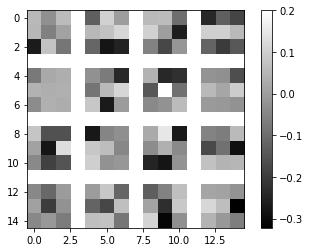

In [32]:

plt.imshow(make_mosaic(w, 4, 4), cmap='gray')
plt.colorbar()
plt.savefig(fig_path, bbox_inches='tight')